## Pandas基础习题


In [1]:
import pandas as pd

### Step 1. 从data目录下加载数据文件chipotle.tsv. 导入数据集，读取数据并存为一个名叫chipo的dataframe，显示前20行数据

In [6]:
#your code
file_path = 'data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep='\t')
print(chipo.head(20).to_string(line_width=1000))

    order_id  quantity                              item_name                                                                                                  choice_description item_price
0          1         1           Chips and Fresh Tomato Salsa                                                                                                                 NaN     $2.39 
1          1         1                                   Izze                                                                                                        [Clementine]     $3.39 
2          1         1                       Nantucket Nectar                                                                                                             [Apple]     $3.39 
3          1         1  Chips and Tomatillo-Green Chili Salsa                                                                                                                 NaN     $2.39 
4          2         2                           Chicke

### Step2. 显示出全部的列名称,并显示数据集的索引

In [8]:
#全部的列名称
#your code
print(chipo.columns)


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [9]:
#数据集的索引
#your code
print(chipo.index)


RangeIndex(start=0, stop=4622, step=1)


### Step3. 订单数最多的商品是什么？（查看前五行）

In [44]:
#your code
item_order_counts = chipo.groupby('item_name')['order_id'].count().sort_values(ascending=False)
print(item_order_counts.head(5))


item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: order_id, dtype: int64


### Step4. 在该数据集对应的时期内，一共有多少订单？

In [14]:
#your code
print(chipo['order_id'].nunique())


1834


### Step5. 将 item_price转成float类型, 新字段名为price

In [19]:
#your code
chipo['price'] = chipo['item_price'].str.replace('$', '').astype(float)
chipo.drop(columns=['item_price'], inplace=True)
print(chipo.to_string(line_width=1000))

      order_id  quantity                              item_name                                                                                                                                                                                         choice_description  price
0            1         1           Chips and Fresh Tomato Salsa                                                                                                                                                                                                        NaN   2.39
1            1         1                                   Izze                                                                                                                                                                                               [Clementine]   3.39
2            1         1                       Nantucket Nectar                                                                                                                   

### Step6.在该数据集对应的时期内，总收入是多少?

In [22]:
#your code
total_revenue = (chipo['price'] * chipo['quantity']).sum()
print(total_revenue)


39237.02


### Step7.所有订单(order)的平均总价是多少？

In [26]:
#your code
average_order_total=total_revenue/chipo['order_id'].nunique()
print('%.2f'% average_order_total)

21.39


### Step8.一共有多少种不同的商品被售出？

In [27]:
#your code
print(chipo['item_name'].nunique())


50


### Step9.将数据集中的列 quantity, item_name,和price单独存为一个名叫item的DataFrame，查看前五行数据

In [28]:
#your code
item = chipo[['quantity', 'item_name', 'price']]
print(item.head())

   quantity                              item_name  price
0         1           Chips and Fresh Tomato Salsa   2.39
1         1                                   Izze   3.39
2         1                       Nantucket Nectar   3.39
3         1  Chips and Tomatillo-Green Chili Salsa   2.39
4         2                           Chicken Bowl  16.98


### Step10.对item按照先price再item_name进行排序（查看前30行）

In [29]:
#your code
item_sorted = item.sort_values(by=['price', 'item_name'])
print(item_sorted.head(30))

      quantity      item_name  price
34           1  Bottled Water   1.09
87           1  Bottled Water   1.09
318          1  Bottled Water   1.09
701          1  Bottled Water   1.09
780          1  Bottled Water   1.09
943          1  Bottled Water   1.09
1140         1  Bottled Water   1.09
2410         1  Bottled Water   1.09
2545         1  Bottled Water   1.09
2754         1  Bottled Water   1.09
2815         1  Bottled Water   1.09
2922         1  Bottled Water   1.09
2981         1  Bottled Water   1.09
3021         1  Bottled Water   1.09
3042         1  Bottled Water   1.09
3361         1  Bottled Water   1.09
3499         1  Bottled Water   1.09
3581         1  Bottled Water   1.09
3667         1  Bottled Water   1.09
3935         1  Bottled Water   1.09
4001         1  Bottled Water   1.09
4069         1  Bottled Water   1.09
28           1    Canned Soda   1.09
53           1    Canned Soda   1.09
107          1    Canned Soda   1.09
117          1    Canned Soda   1.09
1

### Step11.找到price超过25的数据

In [30]:
#your code
price_above_25 = chipo[chipo['price'] > 25]
print(price_above_25.to_string(line_width=1000))


      order_id  quantity                     item_name                                                                                                                                                       choice_description  price
409        178         3                  Chicken Bowl  [[Fresh Tomato Salsa (Mild), Tomatillo-Green Chili Salsa (Medium), Roasted Chili Corn Salsa (Medium)], [Black Beans, Rice, Fajita Veggies, Cheese, Guacamole, Lettuce]]  32.94
1254       511         4               Chicken Burrito                                                                                            [Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Lettuce]]  35.00
1255       511         3                 Steak Burrito                                                                                            [Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Lettuce]]  27.75
1514       616         3                  Chicken Bowl                      

### Step 12.  加载58同城房源销售数据.

In [31]:
#your code
file_path = 'data/58.xlsx'
data = pd.read_excel(file_path)
print(data)

    price  housearea houseoriented  shishu  housefloor housetype
0   50000        100             南       2           3        公寓
1   73513        123            南北       3           4      连排别墅
2   23434         86             北       3           5        公寓
3   45623         45             北       2           8       独立屋
4   18573         65             南       2           7      连排别墅
5   23567         74             南       2           1        公寓
6   85764         89             北       3           9       独立屋
7   63547         56             北       2           8      连排别墅
8   85638         76             南       3          12        公寓
9   23452         75            南北       3           2       独立屋
10  76543         64            南北       2          17        公寓
11  20947         53             北       2          16      连排别墅
12  84461         42            南北       1           4        公寓
13  81746         89            南北       3           3        公寓
14  37461         78     

### Step13. 根据58同城房源销售数据，统计不同房屋类型（housetype）的数量。

In [42]:
#your code
housetype_counts = data['housetype'].value_counts()
housetype_counts.name = 'housetype'
print(housetype_counts)


housetype
公寓      10
连排别墅     5
独立屋      5
Name: housetype, dtype: int64


### Step 14. 根据58同城房源销售数据，统计房屋面积（housearea）分别为0-50，51-70，71-90，以及超过90的房源数量。

In [49]:
#your code
bins = [0, 50, 70, 90, float('inf')]
labels = ['0-50', '51-70', '71-90', '>90']
data2 = pd.cut(data['housearea'], bins=bins, labels=labels, right=False)
area_counts = data2.value_counts().sort_index()
print(area_counts.to_frame(name='count'))

           count
housearea       
0-50           2
51-70          6
71-90          9
>90            3


### Step 15.将14题的结果用5英寸*5英寸饼图表示

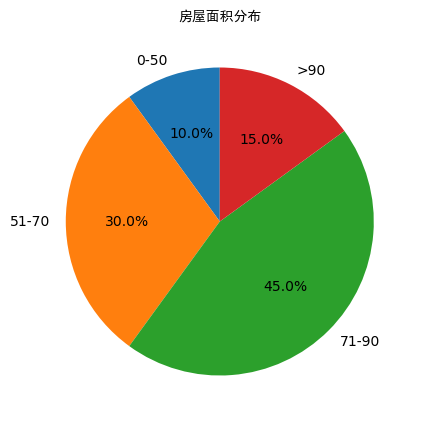

In [55]:
#your code
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font = FontProperties(fname='C:/Windows/Fonts/simhei.ttf') 
plt.figure(figsize=(5, 5))
area_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')  
plt.title('房屋面积分布', fontproperties=font)
plt.show()


### Step 16.将13题的结果分别用水平柱状图和垂直柱状图表示在一张图内

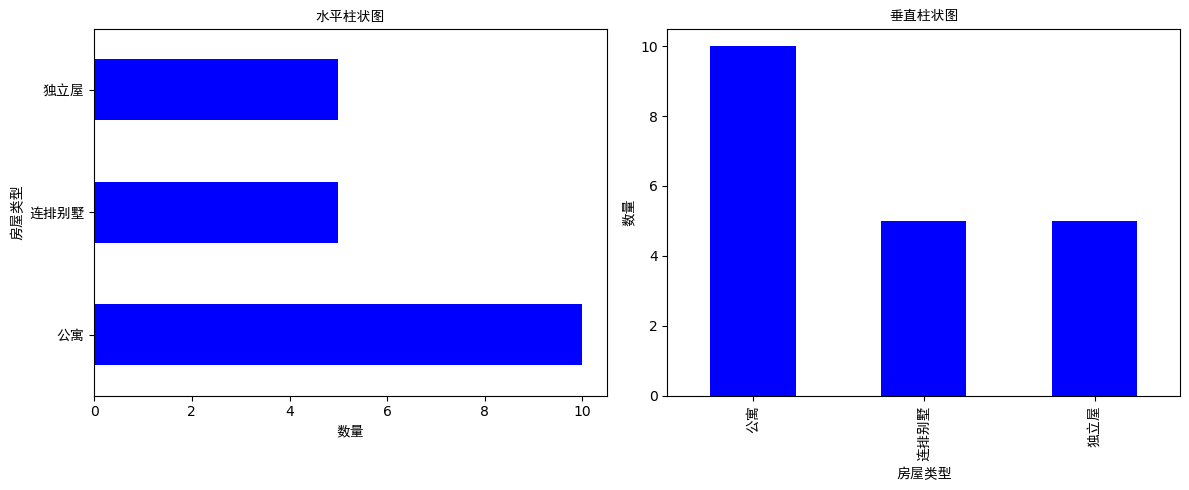

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

housetype_counts.plot(kind='barh', ax=axes[0], color='blue')
axes[0].set_title('水平柱状图', fontproperties=font)
axes[0].set_xlabel('数量', fontproperties=font)
axes[0].set_ylabel('房屋类型', fontproperties=font)
axes[0].set_yticklabels(housetype_counts.index, fontproperties=font)

housetype_counts.plot(kind='bar', ax=axes[1], color='blue')
axes[1].set_title('垂直柱状图', fontproperties=font)
axes[1].set_xlabel('房屋类型', fontproperties=font)
axes[1].set_ylabel('数量', fontproperties=font)
axes[1].set_xticklabels(housetype_counts.index, fontproperties=font)

plt.tight_layout()
plt.show()